# Principal Component Analysis
Using 10kb thinned kin-free Blackfin tuna data. All markers (neutal + putative outliers) included.

In [2]:
library(adegenet)

Load in the data

In [3]:
bft <- read.genepop("../data/bft.kinrm.gen", ncode = 3L, quiet = T)
popNames(bft) <- c("BRZ","BRZSP","KEY","MRT", "PNS", "PR", "SCA","TX","VZ")

## Perform the analysis

## Extract appropriate data

In [4]:
bft.mtx <- tab(bft, freq=TRUE, NA.method="mean")

### Perform the PCA

In [5]:
bft.pca <- dudi.pca(bft.mtx, center=TRUE, scale=FALSE, nf = 300L, scannf = F)
summary(bft.pca)

Class: pca dudi
Call: dudi.pca(df = bft.mtx, center = TRUE, scale = FALSE, scannf = F, 
    nf = 300L)

Total inertia: 60.27

Eigenvalues:
    Ax1     Ax2     Ax3     Ax4     Ax5 
 0.9516  0.6293  0.6200  0.5883  0.5764 

Projected inertia (%):
    Ax1     Ax2     Ax3     Ax4     Ax5 
 1.5790  1.0441  1.0287  0.9762  0.9563 

Cumulative projected inertia (%):
    Ax1   Ax1:2   Ax1:3   Ax1:4   Ax1:5 
  1.579   2.623   3.652   4.628   5.584 

(Only 5 dimensions (out of 325) are shown)



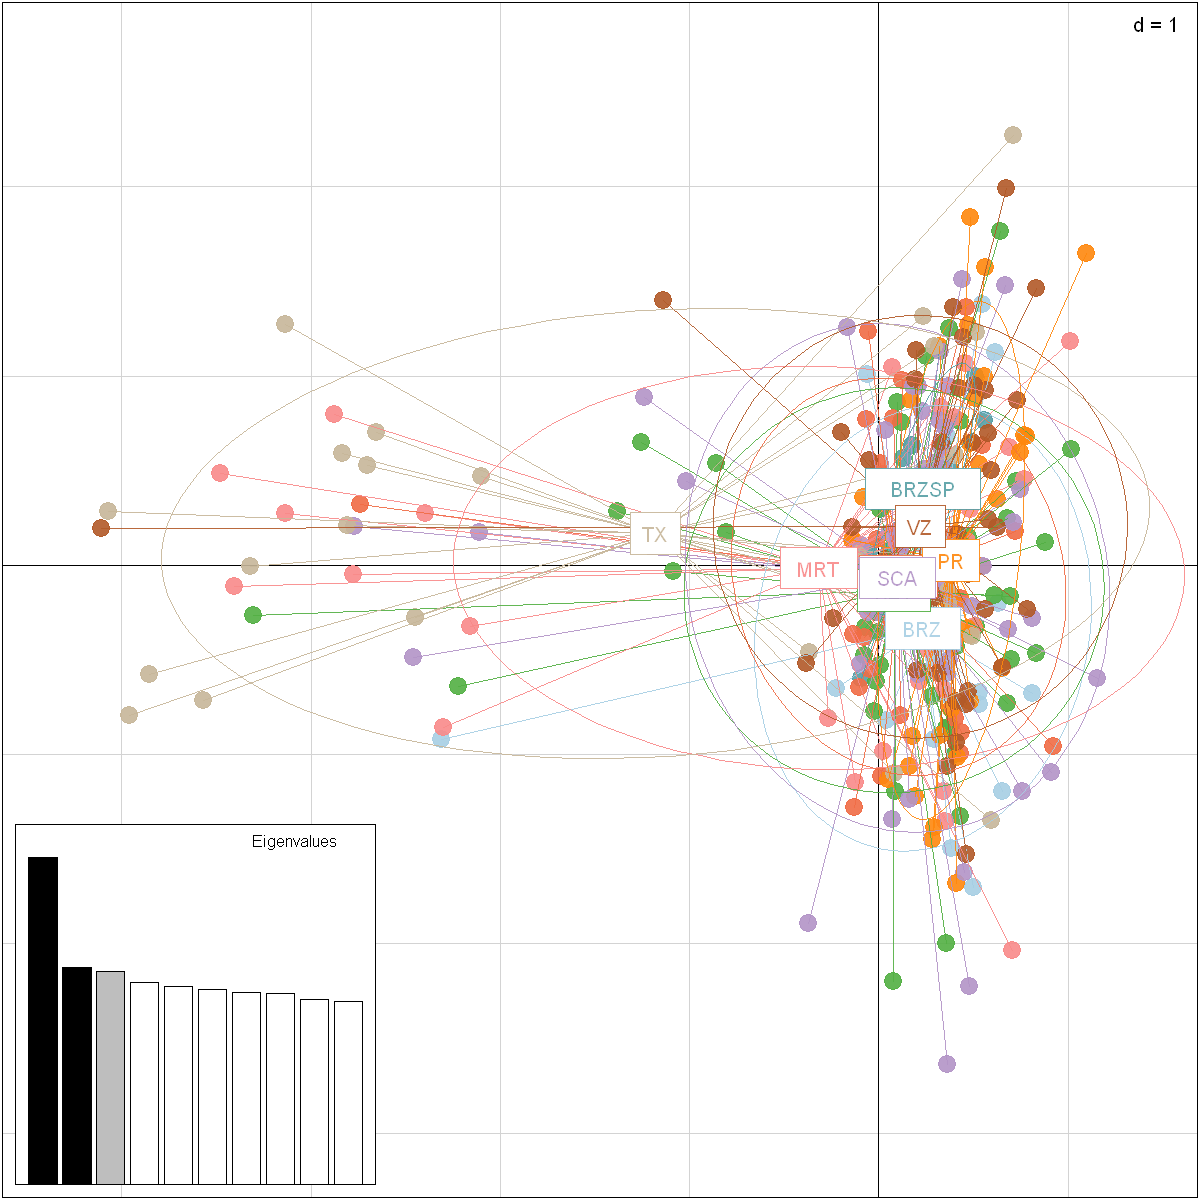

In [6]:
options(repr.plot.width=10, repr.plot.height=10)
s.class(
    bft.pca$li, fac=pop(bft),
    col=transp(funky(9),.9),
    axesel=FALSE, cstar=1, cpoint=3
)
add.scatter.eig(bft.pca$eig[1:10],3,1,2, ratio=.3)

## Principal Coordinate Analysis

In [7]:
bft.pco <- dudi.pco(dist(bft.mtx), scannf=FALSE, nf=300)

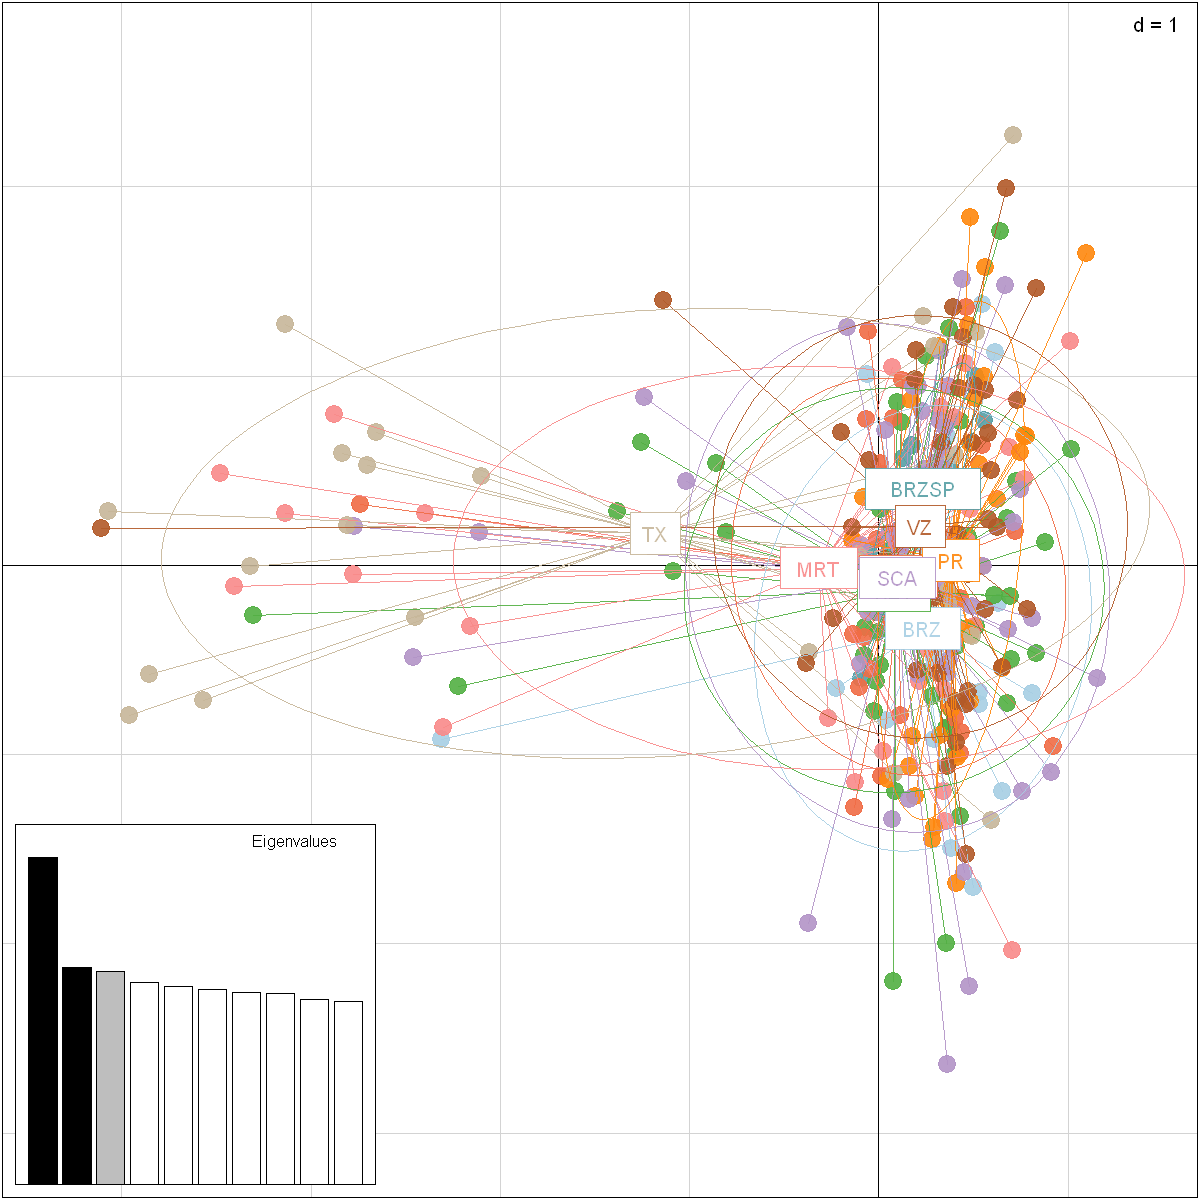

In [8]:
s.class(
    bft.pco$li, fac=pop(bft),
    col=transp(funky(9),.9),
    axesel=FALSE, cstar=1, cpoint=3
)
add.scatter.eig(bft.pco$eig[1:10],3,1,2, ratio=.3)

## Spatial Principal Component Analysis

Read in coordinate data. These coordinates have been approximated from landing area and jittered within locations.

In [27]:
coords <- read.csv("../data/bft.samples.coords", header = T)[,3:2] |> as.matrix()
bft$other$xy <- coords
head(bft$other$xy)

x,y
-34.23892,-6.514887
-34.28009,-6.225666
-34.25426,-6.107638
-34.20739,-6.839412
-34.21773,-5.987247
-34.18286,-6.443716


Warning message in spca.genind(bft, type = 4, ask = FALSE, scannf = FALSE, nfposi = 1, :
"NAs in data are automatically replaced (to mean allele frequency)"


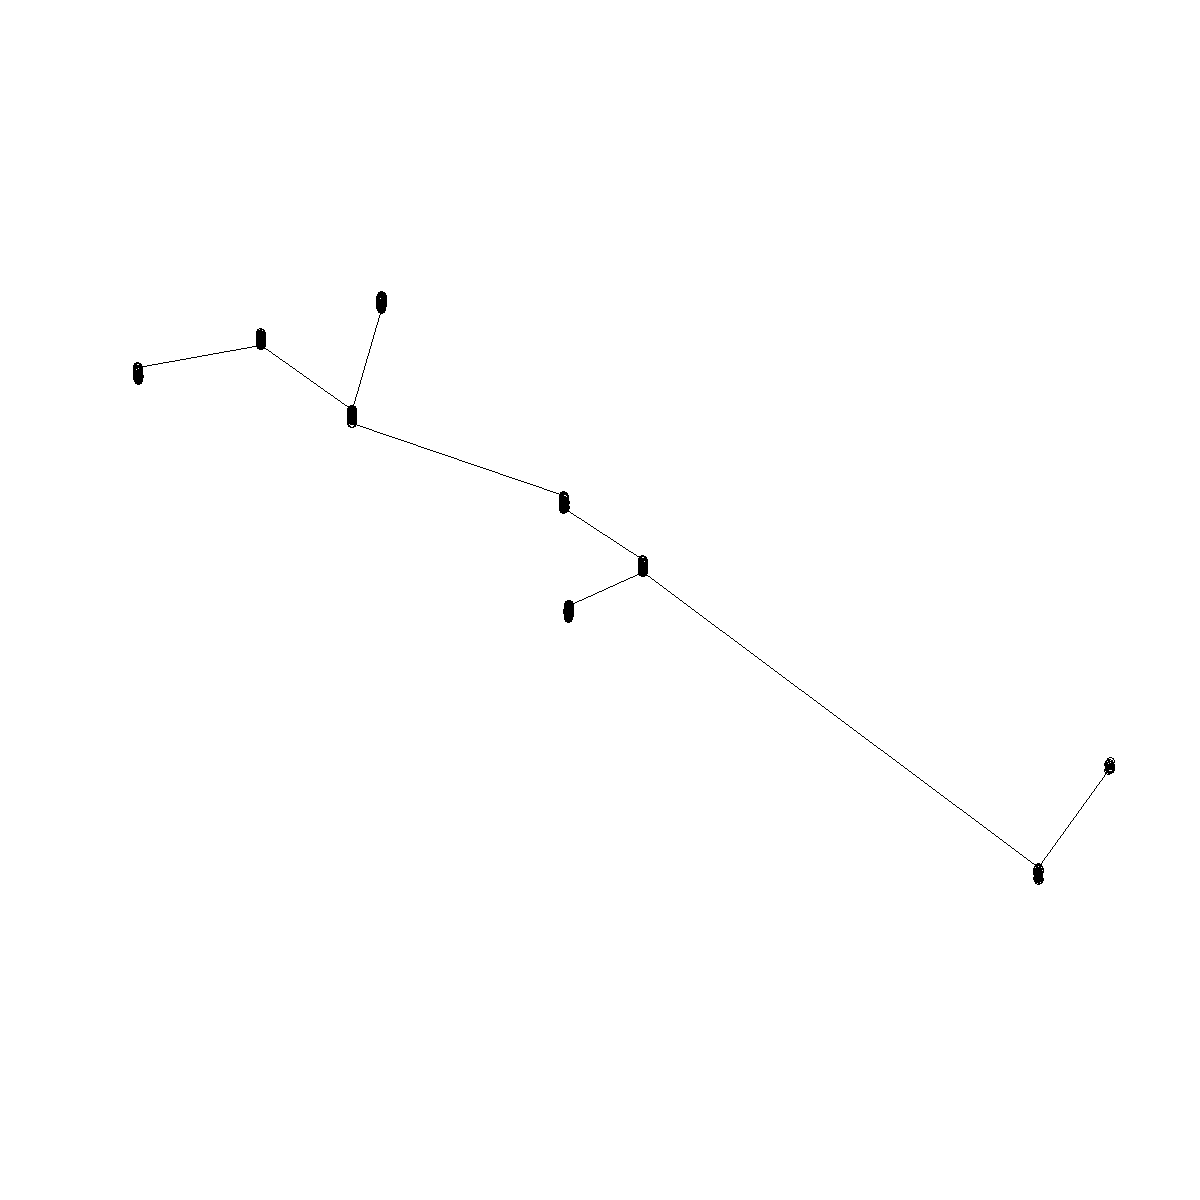

In [50]:
spca.res <- spca(bft, type=4, ask=FALSE, scannf=FALSE, nfposi=1, nfnega=1)

Plot eigenvalues of the analysis in decreasing order
- stored inside `$eig`

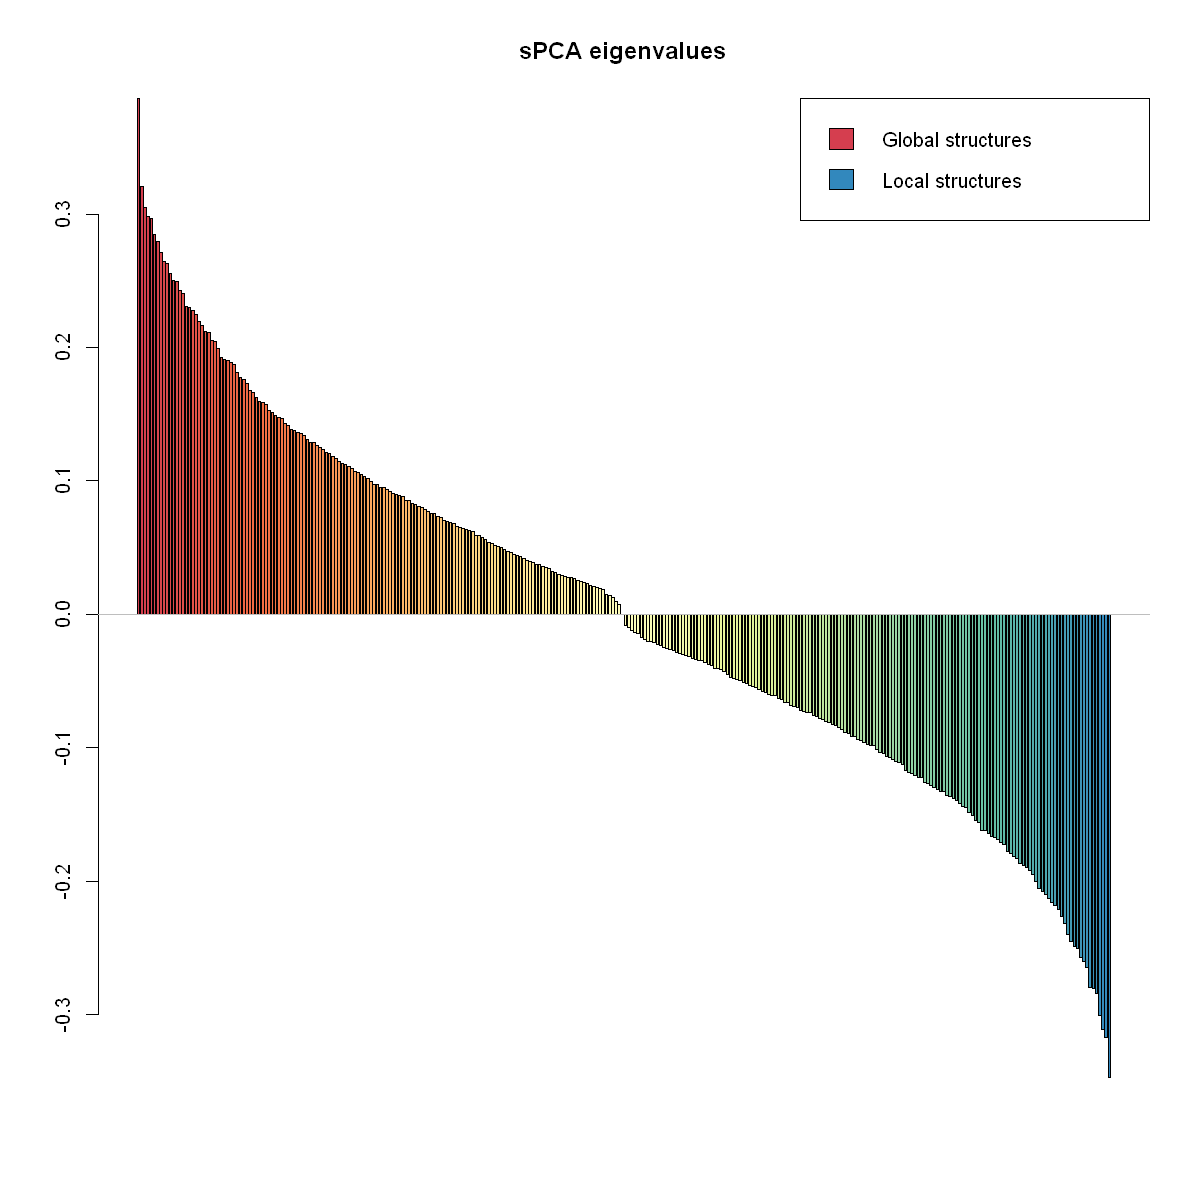

In [52]:
barplot(spca.res$eig, main="sPCA eigenvalues", col=spectral(length(spca.res$eig)))
legend("topright", fill=spectral(2),
       leg=c("Global structures", "Local structures"))
abline(h=0,col="grey")

### Plot the eigenvalues of the sPCA

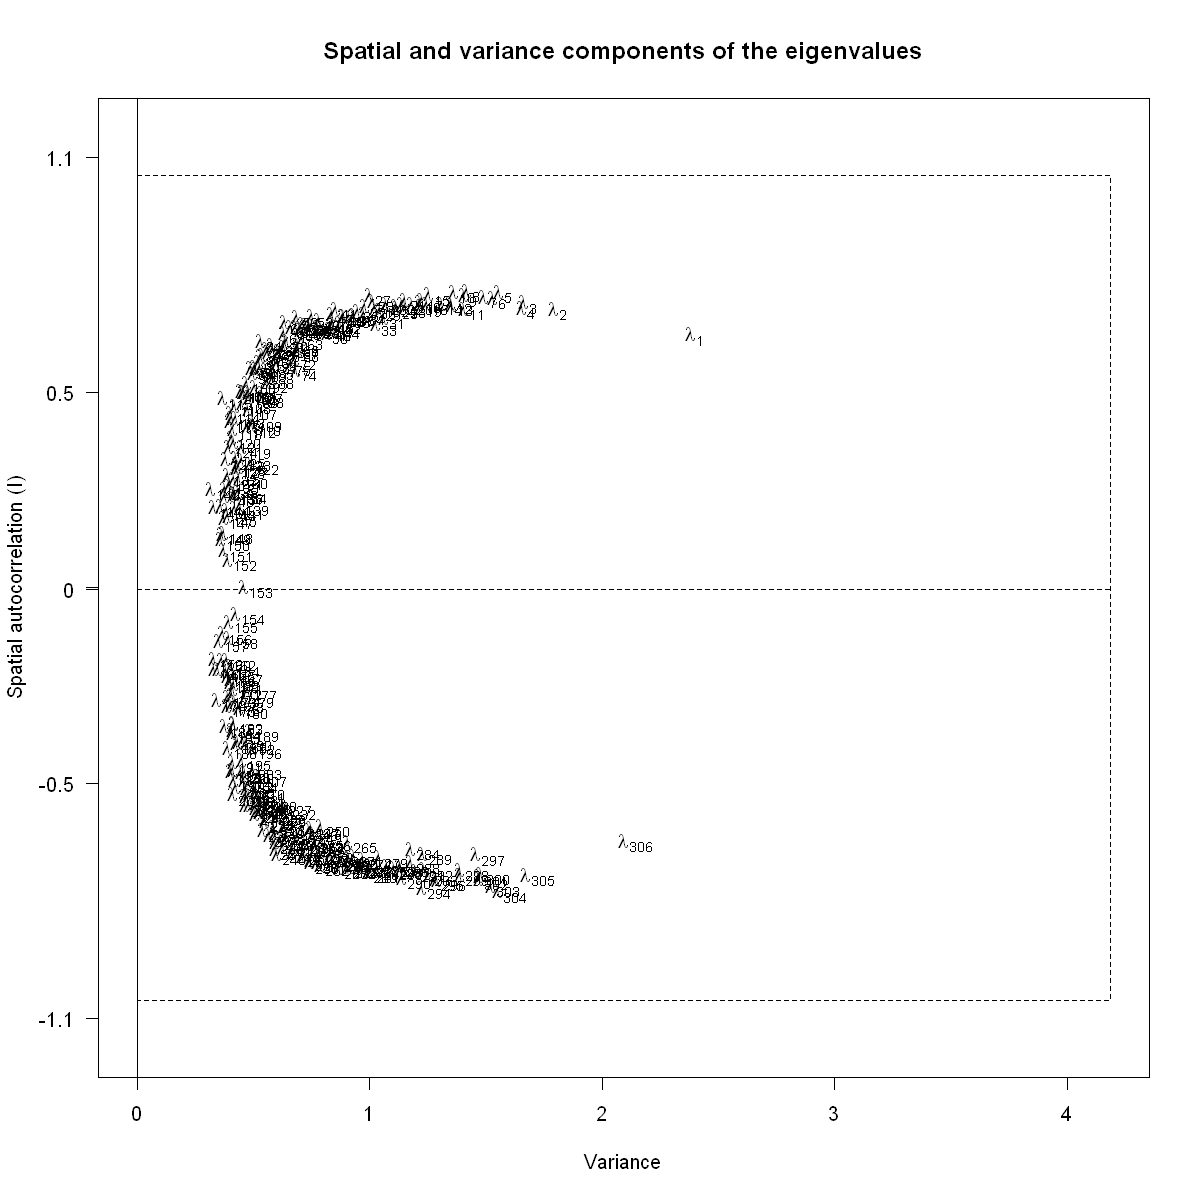

In [53]:
screeplot(spca.res)

### Plot spatial genetic structure of sPCA axes

Jitter for easier visualization

In [82]:
coords.jit <- coords
coords.jit[,1] <- jitter(coords[,1], factor = 4, amount = 0.9)
coords.jit[,2] <- jitter(coords[,2], factor = 4, amount = 0.9)

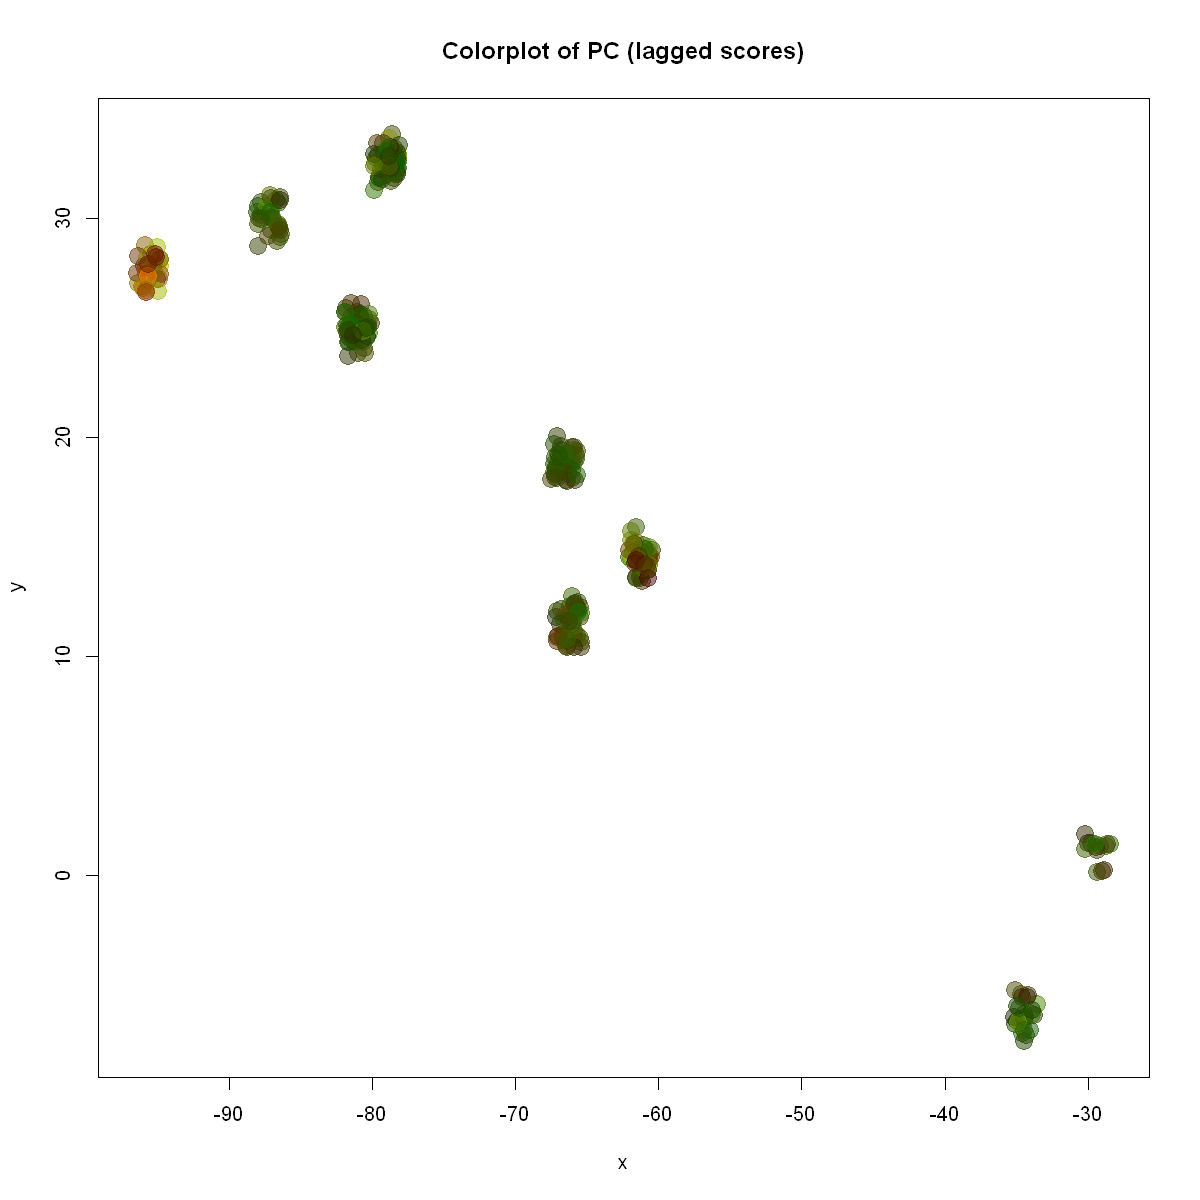

In [83]:
colorplot(coords.jit, spca.res$ls, axes=1:2, transp=T, alpha=0.5, cex=3, add=F, main="Colorplot of PC (lagged scores)")

In [107]:
spca.df <- cbind(spca.res$li, coords.jit)
names(spca.df) <- c("PC1","PC2", "Longitude","Latitude")
head(spca.df)

,PC1,PC2,Longitude,Latitude
,<dbl>,<dbl>,<dbl>,<dbl>
BRZ_1261,-0.26016762,0.6557073,-34.46628,-6.625901
BRZ_1269,-0.30601965,-0.6689846,-33.55222,-5.861857
BRZ_1270,0.04125021,-0.8811516,-34.65351,-5.440380
BRZ_1271,-0.61793541,0.3751560,-35.05771,-6.805882
BRZ_1275,0.04631890,-0.3583577,-35.08737,-5.223063
BRZ_1276,-0.61705421,0.4655001,-33.77652,-6.369115


In [108]:
spca.df[,1] <- spca.df$PC1 + abs(min(spca.df$PC1))
spca.df[,2] <- spca.df$PC2 + abs(min(spca.df$PC2))

In [113]:
colors <- rgb(spca.df$PC1, spca.df$PC2, 1, maxColorValue=max(spca.df[,1:2]))
head(colors)

[1] "#347C33" "#323933" "#432E33" "#226E33" "#444933" "#227333"

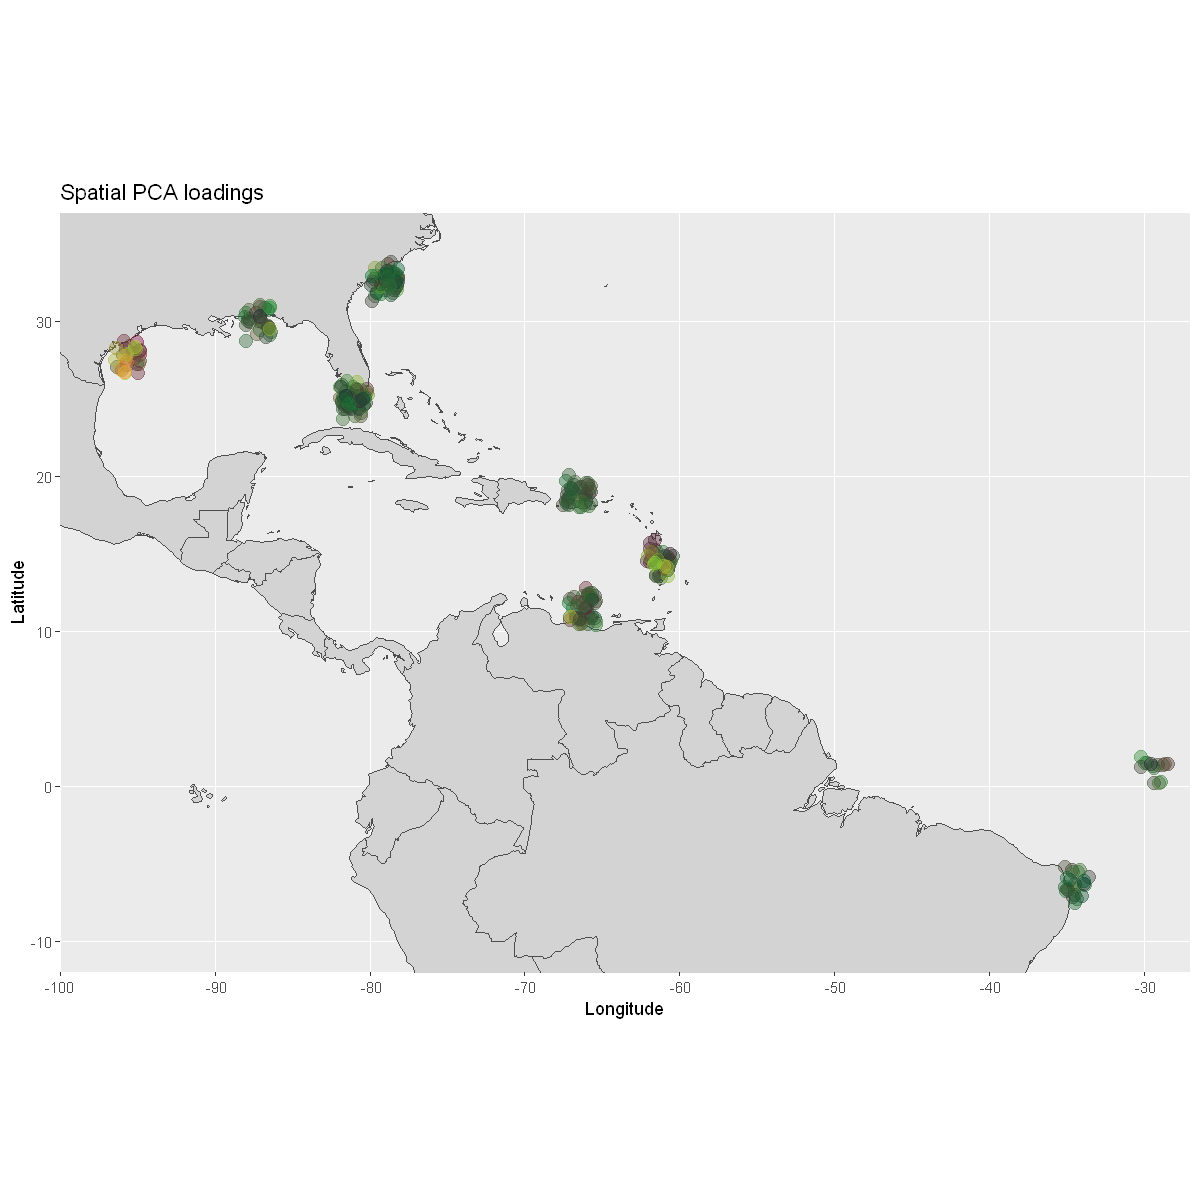

In [123]:
world<-map_data("world")
ggplot()+ 
  geom_polygon(data = world, aes(x=long, y = lat, group = group), fill = "lightgrey", color = "gray30", size = .25)+
  coord_sf(xlim = c(-100, -27), ylim = c(-12, 37), expand = FALSE)  +
  xlab("Longitude")+
  ylab("Latitude")+
  ggtitle("Spatial PCA loadings")+
  geom_point(data=spca.df, aes(x=Longitude, y=Latitude), color = colors, size=3.5, alpha = 0.4)

In [124]:
ggsave("spca.png", height = 7, width = 10, units = "in")